In [4]:
#1.)
import numpy as np

class Perceptron:
    def __init__(self, weights, learning_rate):
        self.weights = weights
        self.learning_rate = learning_rate

    def step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.step_function(weighted_sum)

    def train(self, inputs, labels, epochs):
        for _ in range(epochs):
            for i in range(len(inputs)):
                prediction = self.predict(inputs[i])
                error = labels[i] - prediction
                self.weights[1:] += self.learning_rate * error * inputs[i]
                self.weights[0] += self.learning_rate * error

# Initial weights
initial_weights = np.array([10, 0.2, -0.75])

# Learning rate
learning_rate = 0.05

# AND gate inputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# AND gate labels
labels = np.array([0, 0, 0, 1])

# Initialize Perceptron
perceptron = Perceptron(initial_weights, learning_rate)

# Train Perceptron
perceptron.train(inputs, labels, epochs=100)

# Test the trained Perceptron
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for i in range(len(test_inputs)):
    prediction = perceptron.predict(test_inputs[i])
    print(f"Input: {test_inputs[i]} Predicted Output: {prediction}")


Input: [0 0] Predicted Output: 1
Input: [0 1] Predicted Output: 1
Input: [1 0] Predicted Output: 1
Input: [1 1] Predicted Output: 0


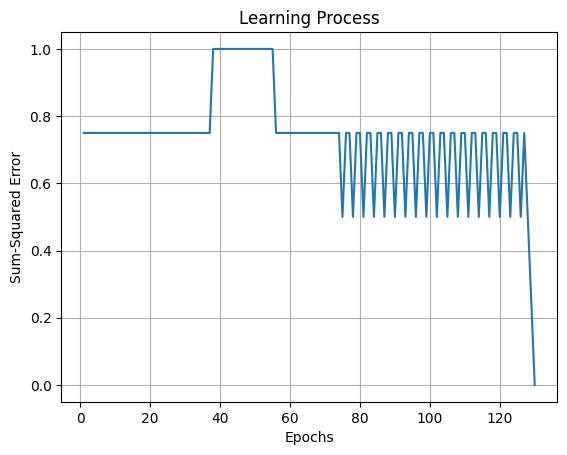

Input: [0 0] Predicted Output: 0
Input: [0 1] Predicted Output: 0
Input: [1 0] Predicted Output: 0
Input: [1 1] Predicted Output: 1


In [11]:
#2.)
import numpy as np
import matplotlib.pyplot as plt

# Define initial weights and learning rate
initial_weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# Define the step activation function
def step_function(x):
  return np.where(x >= 0, 1, 0)

class Perceptron:
  def __init__(self, weights, learning_rate):
    self.weights = weights
    self.learning_rate = learning_rate

  def predict(self, inputs):
    weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
    return step_function(weighted_sum)

  def train(self, inputs, labels, epochs=1000):
    errors = []
    for epoch in range(epochs):
      total_error = 0
      for i in range(len(inputs)):
        prediction = self.predict(inputs[i])
        error = labels[i] - prediction
        total_error += error**2  # Square the error for sum-squared error
        self.weights[1:] += self.learning_rate * error * inputs[i]
        self.weights[0] += self.learning_rate * error

      # Calculate and store average error for the epoch
      average_error = total_error / len(inputs)
      errors.append(average_error)

      # Stop if convergence criterion is met
      if average_error <= 0.002:
        break

    return errors

# AND gate inputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# AND gate labels
labels = np.array([0, 0, 0, 1])

# Initialize Perceptron
perceptron = Perceptron(initial_weights, learning_rate)

# Train Perceptron
errors = perceptron.train(inputs, labels)

# Plot epochs vs errors
epochs = np.arange(1, len(errors) + 1)  # Adjust for indexing
plt.plot(epochs, errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.title("Learning Process")
plt.grid(True)
plt.show()

# Test the trained Perceptron
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for i in range(len(test_inputs)):
  prediction = perceptron.predict(test_inputs[i])
  print(f"Input: {test_inputs[i]} Predicted Output: {prediction}")


In [26]:
#3.)
def bipolar_step(x):
    return 1 if x > 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial weights and learning rate
initial_weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05

class Perceptron:
    def __init__(self, weights, learning_rate):
        self.weights = weights
        self.learning_rate = learning_rate

    def bipolar_step_function(self, x):
        return np.where(x >= 0, 1, -1)

    def sigmoid_function(self, x):
        return 1 / (1 + np.exp(-x))

    def relu_function(self, x):
        return np.maximum(0, x)

    def predict(self, inputs, activation_function):
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if activation_function == 'bipolar_step':
            return self.bipolar_step_function(weighted_sum)
        elif activation_function == 'sigmoid':
            return self.sigmoid_function(weighted_sum)
        elif activation_function == 'relu':
            return self.relu_function(weighted_sum)

    def train(self, inputs, labels, activation_function, epochs=1000):
        errors = []
        for epoch in range(epochs):
            total_error = 0
            for i in range(len(inputs)):
                prediction = self.predict(inputs[i], activation_function)
                error = labels[i] - prediction
                total_error += error**2
                self.weights[1:] += self.learning_rate * error * inputs[i]
                self.weights[0] += self.learning_rate * error

            average_error = total_error / len(inputs)
            errors.append(average_error)

            if average_error <= 0.002:
                break

        return errors, epoch + 1

# AND gate inputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# AND gate labels
labels = np.array([0, 0, 0, 1])

# Initialize Perceptron
perceptron = Perceptron(initial_weights, learning_rate)

activation_functions = ['bipolar_step', 'sigmoid', 'relu']
iterations = {}

for activation_function in activation_functions:
    perceptron = Perceptron(initial_weights, learning_rate)
    errors, num_iterations = perceptron.train(inputs, labels, activation_function)
    iterations[activation_function] = num_iterations

# Print number of iterations taken to converge for each activation function
for activation_function, num_iterations in iterations.items():
    print(f"Iterations taken to converge for {activation_function} activation function: {num_iterations}")



Iterations taken to converge for bipolar_step activation function: 1000
Iterations taken to converge for sigmoid activation function: 1000
Iterations taken to converge for relu activation function: 16


A1 - Learning Rate: 0.05
Final weights: w0: -0.1000, w1: 0.1000, w2: 0.0500
Converged in 130 epochs


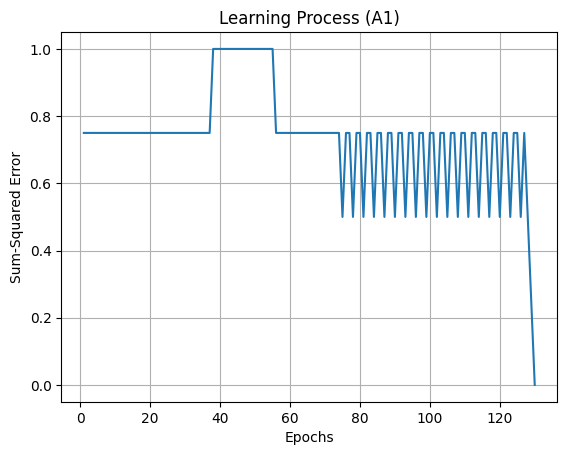

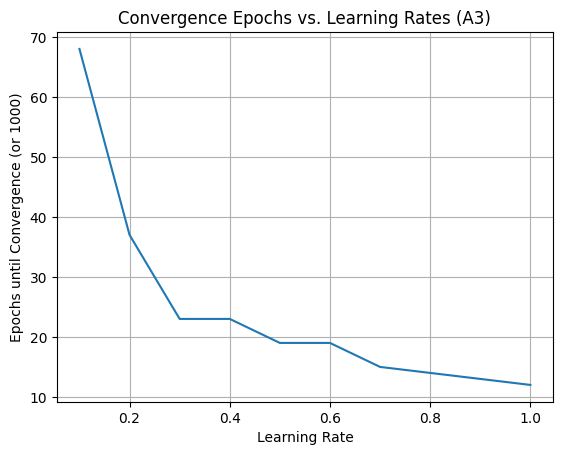

In [29]:
#4.)
import numpy as np
import matplotlib.pyplot as plt

def step(x):
  """Defines the step activation function."""
  return 1 if x >= 0 else 0

def train_perceptron(inputs, outputs, learning_rate, epochs=1000):
  """Trains a single-layer perceptron with the given parameters.

  Args:
      inputs: A NumPy array of training inputs (each row represents an input sample).
      outputs: A NumPy array of desired outputs for the corresponding inputs.
      learning_rate: The learning rate for weight updates.
      epochs: The maximum number of epochs to train for (default: 1000).

  Returns:
      A tuple containing the final weights, the convergence epoch (if achieved),
      and a list of errors per epoch.
  """

  # Initialize weights
  w0 = 10
  w1 = 0.2
  w2 = -0.75

  errors = []
  for epoch in range(epochs):
    total_error = 0
    for i in range(len(inputs)):
      # Calculate weighted sum
      weighted_sum = w0 + np.dot(inputs[i], [w1, w2])

      # Apply activation function
      predicted_output = step(weighted_sum)

      # Calculate error
      error = outputs[i] - predicted_output
      total_error += error**2  # Square the error for sum-squared error

      # Update weights
      w0 += learning_rate * error
      w1 += learning_rate * error * inputs[i][0]
      w2 += learning_rate * error * inputs[i][1]

    # Calculate average error for the epoch
    average_error = total_error / len(inputs)
    errors.append(average_error)

    # Stop if convergence criterion is met
    if average_error <= 0.002:
      return w0, w1, w2, epoch + 1, errors

  # Return weights and errors if convergence not reached within limit
  return w0, w1, w2, epochs, errors

# Training data (inputs and expected outputs)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 0, 0, 1])

# Experiment A1: Run with learning rate 0.05
learning_rate = 0.05
w0, w1, w2, converged_epoch, errors = train_perceptron(inputs, outputs, learning_rate)

# Print results for A1
print("A1 - Learning Rate:", learning_rate)
print(f"Final weights: w0: {w0:.4f}, w1: {w1:.4f}, w2: {w2:.4f}")
if converged_epoch < 1000:
  print(f"Converged in {converged_epoch} epochs")
else:
  print("Convergence not reached within 1000 epochs")

# Plot errors vs epochs for A1
plt.plot(range(1, converged_epoch + 1), errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.title("Learning Process (A1)")
plt.grid(True)
plt.show()

# Experiment A3: Test with various learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
convergence_epochs = []
for lr in learning_rates:
  w0, w1, w2, converged_epoch, _ = train_perceptron(inputs, outputs, lr)
  convergence_epochs.append(converged_epoch if converged_epoch < 1000 else 1000)

# Plot convergence epochs vs learning rates for A3
plt.plot(learning_rates, convergence_epochs)
plt.xlabel("Learning Rate")
plt.ylabel("Epochs until Convergence (or 1000)")
plt.title("Convergence Epochs vs. Learning Rates (A3)")
plt.grid(True)


A1 (XOR) - Learning Rate: 0.05
Final weights: w0: 0.1000, w1: -0.1000, w2: -0.1000
Convergence not reached within 1000 epochs


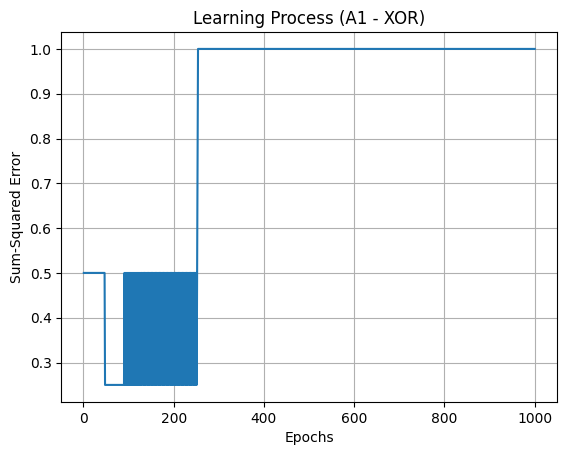

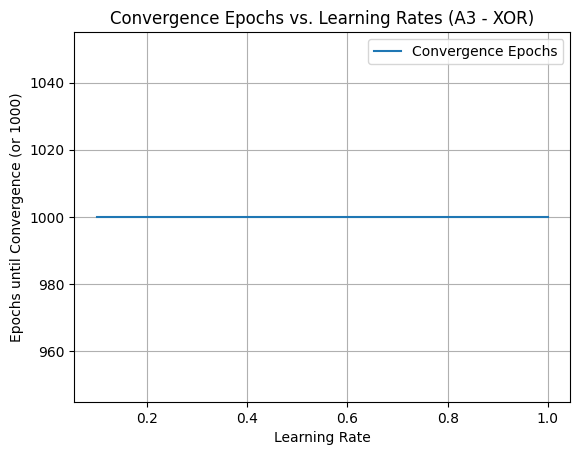

In [30]:
#5.)
import numpy as np
import matplotlib.pyplot as plt

def step(x):
  """Defines the step activation function."""
  return 1 if x >= 0 else 0

def train_perceptron(inputs, outputs, learning_rate, epochs=1000):
  """Trains a single-layer perceptron with the given parameters.

  Args:
      inputs: A NumPy array of training inputs (each row represents an input sample).
      outputs: A NumPy array of desired outputs for the corresponding inputs.
      learning_rate: The learning rate for weight updates.
      epochs: The maximum number of epochs to train for (default: 1000).

  Returns:
      A tuple containing the final weights, the convergence epoch (if achieved),
      and a list of errors per epoch.
  """

  # Initialize weights
  w0 = 10
  w1 = 0.2
  w2 = -0.75

  errors = []
  for epoch in range(epochs):
    total_error = 0
    for i in range(len(inputs)):
      # Calculate weighted sum
      weighted_sum = w0 + np.dot(inputs[i], [w1, w2])

      # Apply activation function
      predicted_output = step(weighted_sum)

      # Calculate error
      error = outputs[i] - predicted_output
      total_error += error**2  # Square the error for sum-squared error

      # Update weights
      w0 += learning_rate * error
      w1 += learning_rate * error * inputs[i][0]
      w2 += learning_rate * error * inputs[i][1]

    # Calculate average error for the epoch
    average_error = total_error / len(inputs)
    errors.append(average_error)

    # Stop if convergence criterion is met
    if average_error <= 0.002:
      return w0, w1, w2, epoch + 1, errors

  # Return weights and errors if convergence not reached within limit
  return w0, w1, w2, epochs, errors

# Training data (inputs and expected outputs) for XOR gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 1, 1, 0])

# Experiment A1: Run with learning rate 0.05
learning_rate = 0.05
w0, w1, w2, converged_epoch, errors = train_perceptron(inputs, outputs, learning_rate)

# Print results for A1 (XOR gate)
print("A1 (XOR) - Learning Rate:", learning_rate)
print(f"Final weights: w0: {w0:.4f}, w1: {w1:.4f}, w2: {w2:.4f}")
if converged_epoch < 1000:
  print(f"Converged in {converged_epoch} epochs")
else:
  print("Convergence not reached within 1000 epochs")

# Plot errors vs epochs for A1 (XOR gate)
plt.plot(range(1, converged_epoch + 1), errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.title("Learning Process (A1 - XOR)")
plt.grid(True)
plt.show()

# Experiment A3: Test with various learning rates (XOR gate)
# Experiment A3: Test with various learning rates (XOR gate)
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
convergence_epochs = []
for lr in learning_rates:
  w0, w1, w2, converged_epoch, _ = train_perceptron(inputs, outputs, lr)
  convergence_epochs.append(converged_epoch if converged_epoch < 1000 else 1000)

# Plot convergence epochs vs learning rates for A3 (XOR gate) with labels
plt.plot(learning_rates, convergence_epochs, label="Convergence Epochs")
plt.xlabel("Learning Rate")
plt.ylabel("Epochs until Convergence (or 1000)")
plt.title("Convergence Epochs vs. Learning Rates (A3 - XOR)")
plt.grid(True)
plt.legend()  # Add legend to show label



In [31]:
# 6.)Customer data

import numpy as np

data = np.array([
    [20, 6, 2, 386, 1],
    [16, 3, 6, 289, 1],
    [27, 6, 2, 393, 1],
    [19, 1, 2, 110, 0],
    [24, 4, 2, 280, 1],
    [22, 1, 5, 167, 0],
    [15, 4, 2, 271, 1],
    [18, 4, 2, 274, 1],
    [21, 1, 4, 148, 0],
    [16, 2, 4, 198, 0]
])

# Shuffle data
np.random.shuffle(data)

# Split features and labels
X = data[:, :-1]
y = data[:, -1]

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Perceptron class
class Perceptron:
    def __init__(self, input_size):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.lr = 0.01  # Learning rate

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                # Forward pass
                z = np.dot(X[i], self.weights) + self.bias
                a = sigmoid(z)

                # Backward pass (gradient descent)
                dcost_dz = a - y[i]
                dz_dw = X[i]
                dz_db = 1

                self.weights -= self.lr * dcost_dz * dz_dw
                self.bias -= self.lr * dcost_dz * dz_db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return sigmoid(z)

# Initialize and train the perceptron
input_size = X.shape[1]
perceptron = Perceptron(input_size)
perceptron.train(X, y, epochs=1000)

# Test the trained perceptron
predictions = perceptron.predict(X)
predictions = np.round(predictions).astype(int)

# Compare predictions with actual labels
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)


Accuracy: 1.0


C:\Users\SUNIL KUMAR REDDY\AppData\Local\Temp\ipykernel_25436\2190062250.py:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [20]:
#7.) Customer data

import numpy as np

data = np.array([
    [20, 6, 2, 386, 1],
    [16, 3, 6, 289, 1],
    [27, 6, 2, 393, 1],
    [19, 1, 2, 110, 0],
    [24, 4, 2, 280, 1],
    [22, 1, 5, 167, 0],
    [15, 4, 2, 271, 1],
    [18, 4, 2, 274, 1],
    [21, 1, 4, 148, 0],
    [16, 2, 4, 198, 0]
])

# Shuffle data
np.random.shuffle(data)

# Split features and labels
X = data[:, :-1]
y = data[:, -1]

# Add bias term to features
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Calculate weights using pseudo-inverse
weights = np.dot(np.linalg.pinv(X), y)

# Predict using the obtained weights
predictions = np.round(sigmoid(np.dot(X, weights))).astype(int)

# Compare predictions with actual labels
accuracy = np.mean(predictions == y)
print("Accuracy with matrix pseudo-inverse:", accuracy)


Accuracy with matrix pseudo-inverse: 0.6


In [21]:
#8
import numpy as np

def sigmoid(x):
  """Defines the sigmoid activation function."""
  return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):
  """Derivative of the sigmoid activation function."""
  return sigmoid(x) * (1 - sigmoid(x))

def train_perceptron(inputs, targets, learning_rate, epochs=1000):
  """Trains a single-layer perceptron with backpropagation.

  Args:
      inputs: A NumPy array of training inputs (each row represents an input sample).
      targets: A NumPy array of desired outputs for the corresponding inputs.
      learning_rate: The learning rate for weight updates.
      epochs: The maximum number of epochs to train for (default: 1000).

  Returns:
      A tuple containing the final weights and the convergence epoch (if achieved).
  """

  # Initialize weights with random values between -1 and 1
  w1 = np.random.rand() - 0.5
  w2 = np.random.rand() - 0.5
  bias = np.random.rand() - 0.5

  for epoch in range(epochs):
    total_error = 0
    for i in range(len(inputs)):
      # Forward pass
      weighted_sum = np.dot(inputs[i], [w1, w2]) + bias
      predicted_output = sigmoid(weighted_sum)

      # Calculate error
      error = targets[i] - predicted_output

      # Backpropagation
      delta_output = error * derivative_sigmoid(predicted_output)
      delta_w1 = delta_output * inputs[i][0]  # Update weight for input 1
      delta_w2 = delta_output * inputs[i][1]  # Update weight for input 2
      delta_bias = delta_output

      # Update weights
      w1 += learning_rate * delta_w1
      w2 += learning_rate * delta_w2
      bias += learning_rate * delta_bias

      total_error += error**2

    # Check for convergence (average error below a threshold)
    average_error = total_error / len(inputs)
    if average_error <= 0.002:
      return w1, w2, bias, epoch + 1  # Return weights and epoch of convergence

  # Return weights if convergence not reached within limit
  return w1, w2, bias, epochs

# Training data (AND gate)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

# Train the perceptron
learning_rate = 0.05
w1, w2, bias, converged_epoch = train_perceptron(inputs, targets, learning_rate)

# Print results
if converged_epoch < 1000:
  print("Converged in", converged_epoch, "epochs.")
  print("Weights:")
  print("w1:", w1)
  print("w2:", w2)
  print("bias:", bias)
else:
  print("Convergence not reached within", epochs, "epochs.")


Convergence not reached within [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130] epochs.


Activation Function: step
Final Weights: [1.00000000e-01 1.38777878e-17]
Final Bias: 0.0


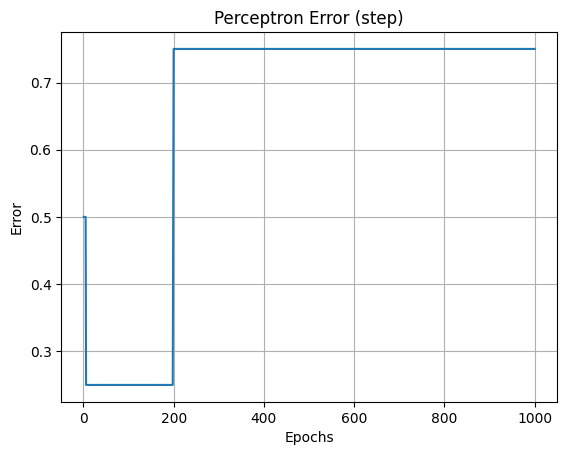

Activation Function: sigmoid
Final Weights: [0.01686915 0.01674429]
Final Bias: 0.0


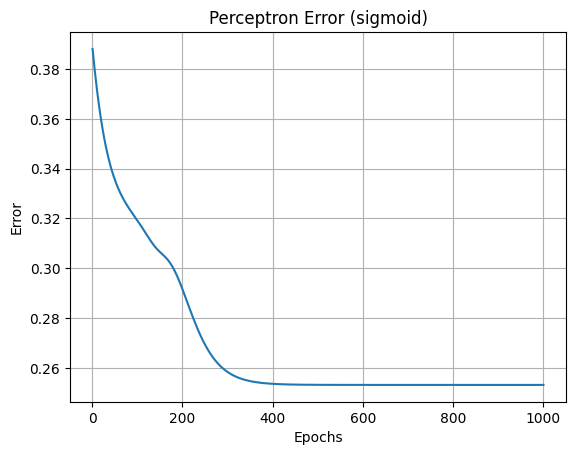

Activation Function: relu
Final Weights: [0.34482759 0.34482759]
Final Bias: 0.0


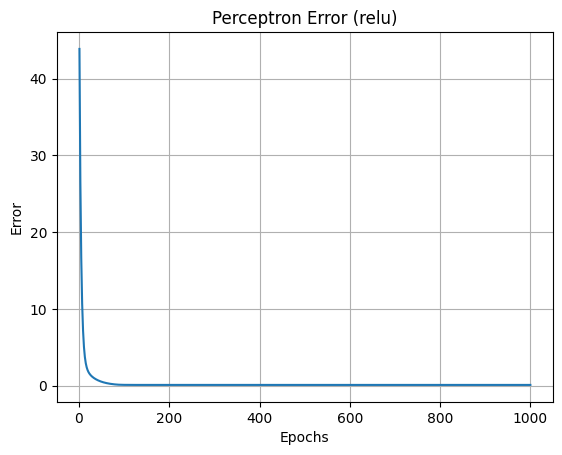

Activation Function: bipolar_step
Final Weights: [1.00000000e-01 1.38777878e-17]
Final Bias: 0.0


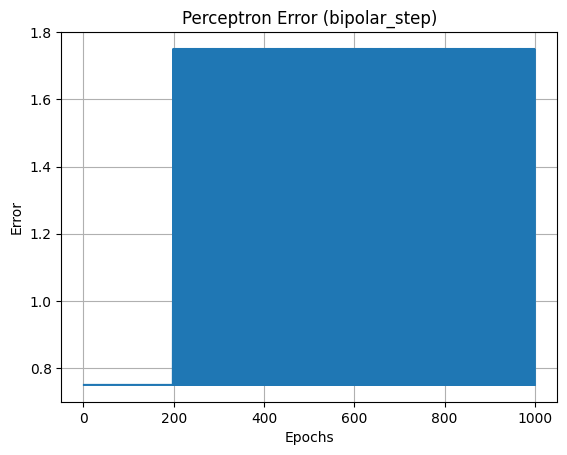

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron(inputs, weights, activation):
    # Ensure inputs is a 2D array for the dot product operation
    inputs = np.atleast_2d(inputs)

    # Calculate the weighted sum (including bias)
    z = np.dot(weights, inputs.T) # Transpose inputs to match dimensions

    # Apply chosen activation function
    if activation == "step":
        output = 1 if z > 0 else 0 
    elif activation == "sigmoid":
        output = 1 / (1 + np.exp(-z))
    elif activation == "relu":
        output = max(0, z)
    elif activation == "bipolar_step":
        output = 1 if z > 0 else -1
    else:
        raise ValueError("Invalid activation function provided.")

    return output

def train_perceptron(data, target, epochs, learning_rate, initial_weights, activation):
  """
  Trains the perceptron model with a given learning rate and activation function.

  Args:
      data: A numpy array of training data points (each row is an input vector).
      target: A numpy array of target outputs.
      epochs: The number of training epochs.
      learning_rate: The learning rate for weight updates.
      initial_weights: A numpy array of initial weights (same dimension as data[0]).
      activation: A function representing the activation function.

  Returns:
      A tuple containing the final weights, bias (assumed to be zero), and a list of errors for each epoch.
  """
  weights = initial_weights[:len(data[0])]  # Take relevant weights based on input dimension
  errors = []

  for epoch in range(epochs):
    total_error = 0
    for i, (x, y) in enumerate(zip(data, target)):
      predicted = perceptron(x, weights, activation)
      error = y - predicted
      total_error += error**2

      # Update weights based on error
      weights += learning_rate * error * x

    # Calculate average error for the epoch
    average_error = total_error / len(data)
    errors.append(average_error)

    # Check for convergence
    if average_error <= 0.002:
      print(f"Converged in {epoch+1} epochs!")
      break

  return weights, 0.0, errors  # Assuming bias is zero

def plot_errors(epochs, errors, title):
  """
  Plots the errors vs epochs.

  Args:
      epochs: A list of epochs.
      errors: A list of errors for each epoch.
      title: The title for the plot.
  """
  plt.plot(epochs, errors)
  plt.xlabel("Epochs")
  plt.ylabel("Error")
  plt.title(title)
  plt.grid(True)
  plt.show()

# Define initial weights and bias (assuming bias is zero)
W0 = 10
W1 = 0.2
W2 = -0.75
bias = 0  # Assuming bias is zero
learning_rate = 0.05

# Sample training data (replace with your actual data)
data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target = np.array([0, 0, 0, 1])

activations = ["step", "sigmoid", "relu", "bipolar_step"]
for activation in activations:
  weights, bias, errors = train_perceptron(data, target, 1000, learning_rate, np.array([W0, W1, W2]), activation)
  print(f"Activation Function: {activation}")
  print(f"Final Weights: {weights}")
  print(f"Final Bias: {bias}")

  # New data point for prediction (replace with your actual data)
  new_data = np.array([0.2, 0.7])

  # Plot errors vs epochs
  plot_errors(range(1, len(errors)+1), errors, f"Perceptron Error ({activation})")

In [37]:
#10
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for data scaling

# Define training data (mapped outputs for 0 and 1)
def get_mapped_data(logic_gate):
  if logic_gate == "AND":
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    targets = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # 1 for 0, 0 for 1
  elif logic_gate == "XOR":
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    targets = np.array([[0, 1], [1, 0], [1, 0], [0, 1]])  # 0 for 0, 1 for 1
  else:
    raise ValueError("Invalid logic gate specified. Choose 'AND' or 'XOR'.")
  return inputs, targets

# Train and evaluate the MLPClassifier
def train_and_evaluate(logic_gate):
  inputs, targets = get_mapped_data(logic_gate)

  # Standardize the input data (may improve convergence for XOR)
  scaler = StandardScaler()
  inputs_scaled = scaler.fit_transform(inputs)

  # Create the MLPClassifier with a single hidden layer, ReLU activation, and increased max_iter
  clf = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(4,), activation='relu', random_state=1, max_iter=1000)
  clf.fit(inputs_scaled, targets)

  # Make predictions and calculate accuracy
  predictions = clf.predict(inputs_scaled)
  accuracy = np.mean(predictions == targets) * 100

  print(f"** {logic_gate.upper()} Gate Results **")
  print(f"Accuracy: {accuracy:.2f}%")

# Run for both AND and XOR gates
train_and_evaluate("AND")
train_and_evaluate("XOR")


** AND Gate Results **
Accuracy: 100.00%
** XOR Gate Results **
Accuracy: 100.00%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
dataset = pd.read_csv('dataset.csv')

# Prepare data
X = dataset.drop('target_column', axis=1)
y = dataset['target_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_clf.fit(X_train_scaled, y_train)
y_pred = mlp_clf.predict(X_test_scaled)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
